In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
G = nx.read_graphml("../data/comics/comic-heroes-type.graphml")

In [11]:
print(G)

Graph with 19286 nodes and 96519 edges


In [17]:
for node, data in G.nodes(data=True): # iterate over all the nodes in the graph

    if "type" in data:
        # add mode attribute 1/2 for visualization later

        if data["type"] == "hero":
            G.nodes[node]["mode"] = 1
        else:
             G.nodes[node]["mode"] = 2

# Remove wrong edges to transform into bipartite
wrong_edges = []
for e in G.edges():
    src, dst = e
    if G.nodes[src]["type"] == G.nodes[dst]["type"]:
        wrong_edges.append(e)
G.remove_edges_from(wrong_edges)

In [19]:
print(bipartite.is_bipartite(G))
top_nodes = {n for n, d in G.nodes(data=True) if d["mode"] == 2}
bottom_nodes = set(G) - top_nodes

True


In [27]:
G_heroes = bipartite.weighted_projected_graph(G, bottom_nodes, ratio=False)

In [28]:
print(G_heroes)

nx.write_graphml(G_heroes,path="../data/comics/hero_social_weighted_projection.graphml")

nx.density(G_heroes)

Graph with 6438 nodes and 167073 edges


0.008063095156568771

#### Esercizio

Considera la proiezione di co-occorrenza dei supereroi nella rete bipartita supereroi-fumetti.

- Calcola numero di nodi ed edge
- Calcola la densità: è una rete sparsa?
- Calcola il grado medio: quanto è lontano dal grado mediano? Cosa possiamo ipotizzare?
- Stampa la degree distribution del grafo e confrontala con la distribuzione dell'equivalente grafo casuale.
- Chi sono i supereroi che appaiono più spesso insieme ad altri? Individuane il top 10%
- Quali sono le 3 coppie di supereroi che appaiono più spesso insieme?
- Qual è la massima co-occorenza tra due supereroi? E quella media?
- Visualizza la rete su Gephi effettuando community detection sui nodi


In [33]:
# Numero di Nodi ed Edge

nodes, edges = G_heroes.order(), G_heroes.size()
nodes, edges

(6438, 167073)

In [35]:
# Density

density = nx.density(G_heroes)
density

0.008063095156568771

In [41]:
# Mean and Median Degree

degree_list = list(dict(G_heroes.degree()).values())

mean_degree = np.mean(degree_list)
print(mean_degree)

median_degree = np.median(degree_list)
print(median_degree)

51.90214352283318
20.0


Text(0, 0.5, 'P(X=x)')

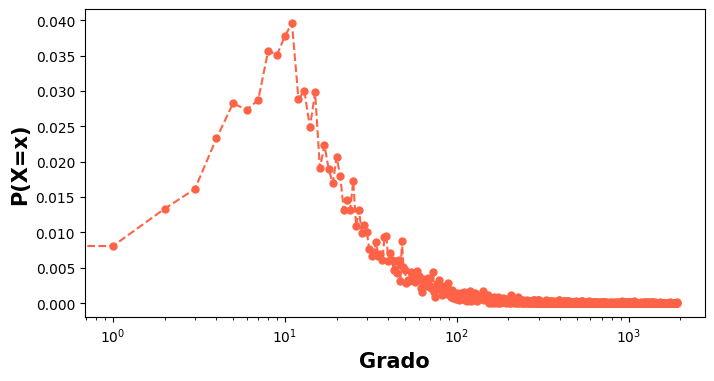

In [43]:
# Plot the Degree Distribution

np.arange(min(degree_list),max(degree_list)+1)
count,bins = np.histogram(degree_list, bins=np.arange(min(degree_list),max(degree_list)+2))

pdf = count / G_heroes.order()
fig = plt.figure(figsize=(8,4))
plt.plot(bins[:-1],pdf, color='tomato',marker='o', linestyle='--', ms=5)
plt.xscale('log')
plt.xlabel('Grado',size=15, weight = 'bold')
plt.ylabel('P(X=x)',size=15, weight = 'bold')

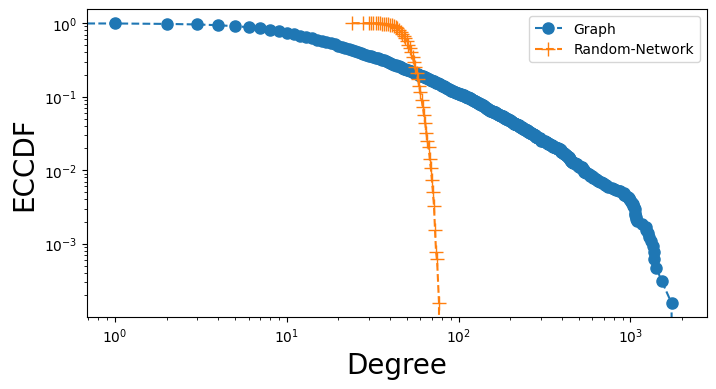

In [45]:
random_graph = nx.fast_gnp_random_graph(nodes,density)
random_degree = list(dict(random_graph.degree()).values())
cdf = ECDF(degree_list)
x = np.unique(degree_list)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--',label='Graph')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--',label='Random-Network')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
axes.legend()

In [56]:
percentile_90 = np.percentile(degree_list, 90)

top_heroes = [
    n for n in G_heroes.nodes()
    if G.degree[n] > percentile_90
]

top_heroes

['GALACTUS/GALAN',
 'WOLVERINE/LOGAN',
 'CAPTAIN AMERICA',
 'HELLCAT/PATSY WALKER',
 'BOOMER/TABITHA SMITH',
 'QUICKSILVER/PIETRO M',
 'THUNDERBIRD II/JAMES',
 'OSBORN, LIZ ALLAN',
 'MAGIK/ILLYANA RASPUT',
 'QUASAR III/WENDELL V',
 'URICH, BEN',
 "SHANNA/SHANNA O'HARA",
 'WATSON, ANNA',
 'CRYSTAL [INHUMAN]',
 'MR. FANTASTIC/REED R',
 'IRON FIST/DANIEL RAN',
 'NIGHTHAWK II/KYLE RI',
 'HAWK',
 'MAN-THING/THEODORE T',
 'BISHOP /',
 'SPIDER-MAN/PETER PAR',
 'SPIDER-MAN CLONE/BEN',
 'BEAST/HENRY &HANK& P',
 'NELSON, FRANKLIN FOG',
 'JAMESON, COL. JOHN',
 'FIRESTAR/ANGELICA JO',
 'NOVA/RICHARD RIDER',
 'MACTAGGERT, MOIRA KI',
 'MASTERS, ALICIA REIS',
 'TALBOT, GLENN',
 'MOONDRAGON/HEATHER D',
 'USAGENT/CAPTAIN JOHN',
 'VOLSTAGG',
 'BLACK BOLT/BLACKANTO',
 'ZABU',
 'PARKER, MAY',
 'KINCAID, DR. JANE FO',
 'SUB-MARINER/NAMOR MA',
 'CAPTAIN BRITAIN/BRIA',
 'CANNONBALL II/SAM GU',
 'JUSTICE II/VANCE AST',
 'ANGEL/WARREN KENNETH',
 'BALDER [ASGARDIAN]',
 'SHADOWCAT/KATHERINE',
 'FANDRAL [ASGARDIA

In [82]:
sorted(
    G_heroes.edges(data=True),
    key=lambda e: e[2]['weight'],
    reverse=True
)[:3]



[('THING/BENJAMIN J. GR', 'HUMAN TORCH/JOHNNY S', {'weight': 744}),
 ('MR. FANTASTIC/REED R', 'HUMAN TORCH/JOHNNY S', {'weight': 713}),
 ('MR. FANTASTIC/REED R', 'THING/BENJAMIN J. GR', {'weight': 708})]

In [83]:
sorted(
    G_heroes.edges(data=True),
    key=lambda e: e[2]['weight'],
    reverse=True
)[0]

('THING/BENJAMIN J. GR', 'HUMAN TORCH/JOHNNY S', {'weight': 744})

In [87]:
weights = [data['weight'] for n1, n2, data in G_heroes.edges(data=True)]

np.max(weights), np.mean(weights)

(np.int64(744), np.float64(3.40871355634962))